In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from skimage.io import imread_collection
from skimage.transform import resize
from skimage.color import rgb2gray
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the images from the dataset
image_paths = "/content/drive/MyDrive/Classroom/coil-100/obj*__*.png"
images = imread_collection(image_paths)

if not images:
    raise ValueError("No images were loaded from the dataset")
    
num_images = len(images)
image_shape = images[0].shape
for image in images:
    if image.shape != image_shape:
        raise ValueError("All images in the dataset must have the same shape")

In [ ]:
# Extract features from the images
resized_images = []
for image in images:
    resized_image = resize(image, (32, 32))
    grayscale_image = rgb2gray(resized_image)
    resized_images.append(grayscale_image)
X = np.array(resized_images).reshape(num_images, -1)

if not X.any():
    raise ValueError("No features were extracted from the images")


In [ ]:
# Generate random labels for the images
num_classes = 100
y = np.random.randint(0, num_classes, num_images)

In [ ]:
# Extract features from the images
resized_images = []
for image in images:
    resized_image = resize(image, (32, 32))
    grayscale_image = rgb2gray(resized_image)
    resized_images.append(grayscale_image)

X = np.array(resized_images).reshape(num_images, -1)

if not X.any():
    raise ValueError("No features were extracted from the images")

In [ ]:
# Reduce the dimensionality of the feature set using LDA and PCA
lda = LinearDiscriminantAnalysis(n_components=50)
X_lda = lda.fit_transform(X, y)
pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_lda)

In [ ]:
# Train a KNN classifier on the reduced feature set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y)

KNeighborsClassifier()

In [ ]:
# Select a random image for detection
random_image_idx = np.random.randint(num_images)
new_image = images[random_image_idx]

In [ ]:
# Resize and convert the image to grayscale
resized_image = resize(new_image, (32, 32))
grayscale_image = rgb2gray(resized_image)

In [ ]:
# Flatten the image into a 1D array
X_new = grayscale_image.flatten().reshape(1, -1)


In [ ]:
# Transform the features using the LDA and PCA models
X_new_lda = lda.transform(X_new)
X_new_pca = pca.transform(X_new_lda)

In [ ]:
# Predict the label of the object in the image using the KNN classifier
y_pred = knn.predict(X_new_pca)

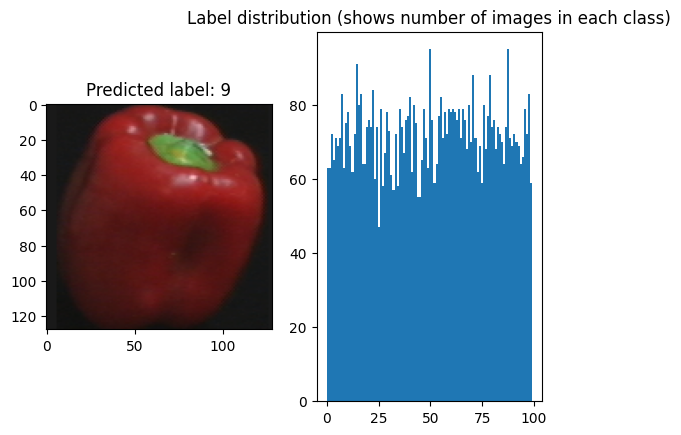

In [ ]:
# Show the image and predicted label
plt.subplot(121)
plt.imshow(new_image)
plt.title(f"Predicted label: {y_pred[0]}")

# Plot a histogram of the label distribution
plt.subplot(122)
plt.hist(y, bins=num_classes)
plt.title("Label distribution (shows number of images in each class)")

plt.show()

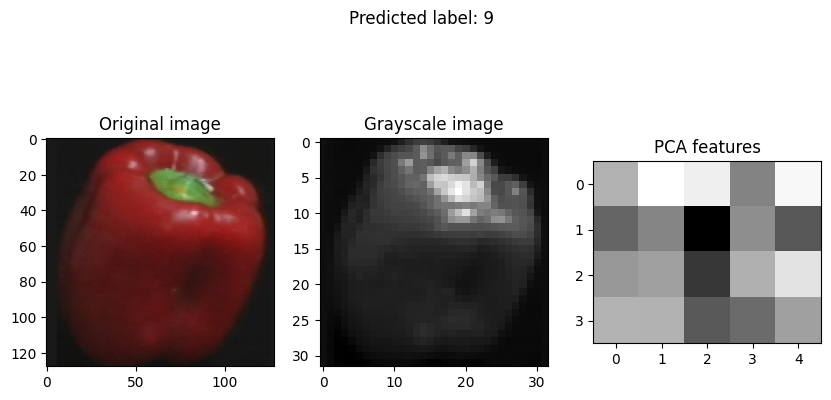

In [ ]:
# Show the image and predicted label
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(new_image)
axs[0].set_title(f"Original image")
axs[1].imshow(grayscale_image, cmap='gray')
axs[1].set_title(f"Grayscale image")
axs[2].imshow(X_new_pca.reshape(1, -1).reshape(4, 5), cmap='gray')
axs[2].set_title(f"PCA features")
plt.suptitle(f"Predicted label: {y_pred[0]}")
plt.show()